# 逻辑回归（logistic regression）

## 介绍

逻辑回归其本质是分类问题


simgmod 函数:$$f(t)=\frac{1}{1+e^ {-t}}$$

逻辑回归模型是一种分类模型，用条件概率分布的形式表示 P(Y|X)，这里随机变量 X 取值为 n 维实数向量

假设有一个二分类问题，输出为y∈{0,1}，线性回归模型$z=w^Tx+b$是个实数值，我们希望有一个理想的阶跃函数来帮我什么实现z值到0/1值的转化，于是找到了Sigmoid函数来代替

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(-10,11)

In [10]:
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [11]:
def sigmod(x):
    return 1/(1+np.exp(-x))

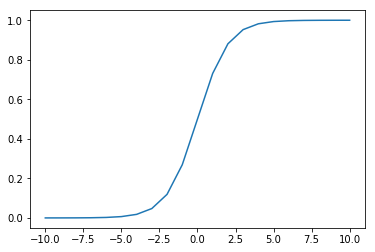

In [12]:

y=sigmod(x)
plt.plot(x,y)
plt.show()

由此可见sigmod函数取值在[0,1]之间

当$x>0$时，$y>0.5$   
当$x<0$时，$y<0.5$   

$$\hat{p}=\frac{1}{1+e^{-\theta^T\cdot X}}$$

**代价函数**：$$J(\theta)=\frac{1}{m}\cdot \sum_{i=1}^m -y^{(i)}\cdot log(\hat{p^{(i)}})-(1-y^{(i)})\cdot log(1-\hat{p^{(i)}})$$

没有公式解，只能采用梯度下降求解

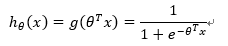

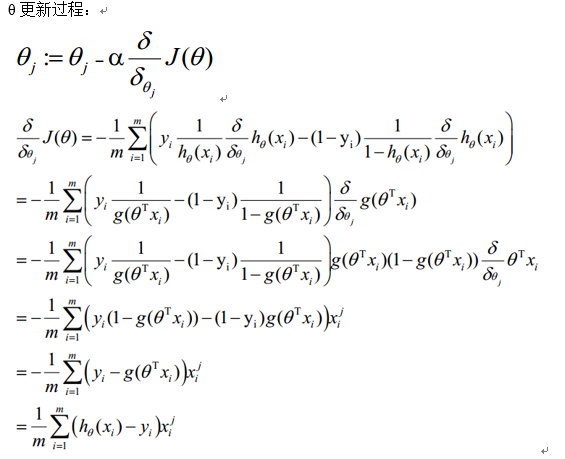

更新过程就变为了：
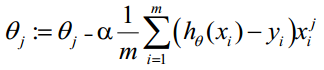

**向量化**   
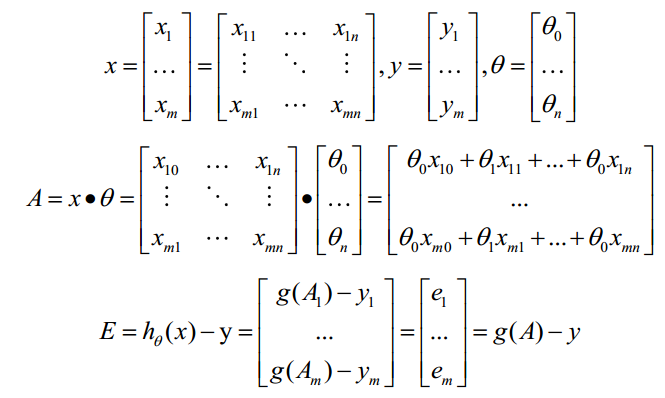


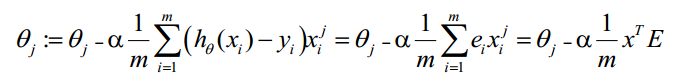

**正则化**   
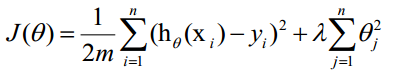

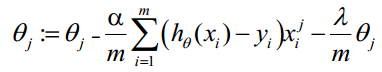

## 手写lr模型

In [56]:
import numpy as np
from sklearn.metrics import accuracy_score


class LR:
    '''
    coef_:权值
    intercept_:偏置项
    theta：梯度
    '''

    def __inint__(self):
        self.coef_ = None
        self.intercept_ = None
        self.theta = None

    def sigmod(self, t):
        return 1./(1.+np.exp(-t))

#         训练器
    def fit(self, x_train, y_train, eta=0.01, n=1e5):
        '''
        J函数：sigmoid函数的导数
        dj函数：f（x）的导数
        d_g函数：目标函数的导数
        '''
        def J(theta, x_b, y):
            y_hat = self.sigmod(x_b.dot(theta))
            return -np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))/len(y)

        def dJ(theta, x_b, y):
            return -x_b.T.dot(self.sigmod(x_b.dot(theta))-y)/len(y)

        def d_g(i_theta, x_b, y, n=1e5, epsilon=1e-8):
#             初始化参数
            theta = i_theta
            i = 0
            while i < n:
#                 求导
                gradient = dJ(theta, x_b, y)
#                 参数更新
                last_theta = theta
                theta = theta-eta*gradient
#                 停止条件
                if abs(J(theta, x_b, y)-J(last_theta, x_b, y)) < epsilon:
                    break
                i += 1
            return theta
        
        x_b = np.hstack([np.ones((len(x_train), 1)), x_train])
        i_theta = np.zeros(x_b.shape[1])
        self.theta = d_g(i_theta, x_b, y_train)
        self.coef_ = self.theta[1:]
        self.intercept_ = self.theta[0]
        return self

#         预测函数
    def predict(self, x_test):
        x_b = np.hstack([np.ones((len(x_test), 1)), x_test])
        proba = self.sigmod(x_b.dot(self.theta))
        return np.array(proba >= 0.5, dtype='int')
#     评估器
    def score(self, x_test, y_test):
        y_predict = self.predict(x_test)
        return accuracy_score(y_test, y_predict)

In [21]:
from sklearn import datasets

In [22]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x = x[y<2,:2]
y = y[y<2]

In [38]:
x.shape

(100, 2)

In [39]:
y.shape

(100,)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [25]:
x_train[:5],y_train[:5]

(array([[5. , 3.4],
        [6.2, 2.2],
        [6.7, 3. ],
        [5.4, 3.4],
        [5.1, 3.4]]), array([0, 1, 1, 0, 0]))

In [57]:
reg=LR()
reg.fit(x_train, y_train)

C:\Users\yep\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\yep\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\yep\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


In [58]:
reg.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [59]:
reg.score(x_test,y_test)

0.48

## 二阶特征组合

上述方法采用的是线性的决策边界，即sigmod函数的$-t$ 是线性函数，可以考虑采用多项式函数来拟合

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [79]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(x, y)

C:\Users\yep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [81]:
poly_log_reg.score(x, y)

1.0

In [82]:
poly_log_reg = PolynomialLogisticRegression(degree=20)
poly_log_reg.fit(x, y)

C:\Users\yep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [83]:
poly_log_reg.score(x, y)

1.0

# sklearn中的logistic回归

sklearn 中的[logistic回归](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)，默认采用$l_2$ 正则化，且其正则化方式采用$C\cdot J(\theta)+l_2$

当solver ='liblinear'时，'multinomial'（oVo）不可用

默认求解器现在是 ’lbfgs’ ，C默认为1.0


使用多项式函数拟合sigmod函数的方式：  
1. 使用通过 pipline 将PolynomialFeatures、 StandardScaler、LogisticRegression组合起来
2. 使用交叉验证的方法来验证不同的超参数

liblinear应用了坐标下降算法（Coordinate Descent, CD），并基于 scikit-learn 内附的高性能 C++ 库 LIBLINEAR library 实现。不过 CD 算法训练的模型不是真正意义上的多分类模型，而是基于 “one-vs-rest” 思想分解了这个优化问题，为每个类别都训练了一个二元分类器

lbfgs, sag 和 newton-cg 求解器只支持 L2罚项，对某些高维数据收敛更快。这些求解器的参数 multi_class设为 multinomial 即可训练一个真正的多项式 logistic 回归  ，其预测的概率比默认的 “one-vs-rest” 设定更为准确。

sag 求解器基于平均随机梯度下降算法（Stochastic Average Gradient descent） 。在大数据集上的表现更快，大数据集指样本量大且特征数多。

saga 求解器  是 sag 的一类变体，它支持非平滑（non-smooth）的 L1 正则选项 penalty="l1" 。因此对于稀疏多项式 logistic 回归 ，往往选用该求解器。

lbfgs是一种近似于Broyden–Fletcher–Goldfarb–Shanno算法的优化算法，属于准牛顿法。lbfgs求解器推荐用于较小的数据集，对于较大的数据集，它的性能会受到影响。

In [85]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y)

C:\Users\yep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [86]:
clf.predict(X[:2, :])


array([0, 0])

In [87]:
clf.predict_proba(X[:2, :]) 


array([[9.81797141e-01, 1.82028445e-02, 1.44269293e-08],
       [9.71725476e-01, 2.82744937e-02, 3.01659208e-08]])

In [88]:
clf.score(X, y)

0.9733333333333334

In [91]:
clf = LogisticRegression(random_state=0, solver='saga',
                         multi_class='multinomial').fit(X, y)

C:\Users\yep\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [92]:
clf.score(X, y)

0.9866666666666667

同时sklearn也封装了[LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV) 对 logistic 回归 的实现内置了交叉验证（cross-validation），可以找出最优的 C参数 

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [102]:
%%time
from sklearn.linear_model import LogisticRegressionCV

log_reg_cv = LogisticRegressionCV()
log_reg_cv.fit(X_train, y_train)

Wall time: 201 ms


C:\Users\yep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\yep\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [103]:
log_reg_cv.Cs_
#C的数组，即用于交叉验证的正则化参数值的倒数

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [104]:
#
log_reg_cv.C_

array([4.64158883e-02, 1.66810054e+02, 2.15443469e+01])

In [111]:
log_reg_cv = LogisticRegressionCV(penalty ='l1',solver ='saga')

In [112]:
log_reg_cv.fit(X_train, y_train)

C:\Users\yep\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\yep\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\yep\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\yep\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\yep\Anaconda3\lib\site-packages\sklearn\linear_model\sag.

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l1',
           random_state=None, refit=True, scoring=None, solver='saga',
           tol=0.0001, verbose=0)